Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

<krk>


  0%|          | 0/50 [00:00<?, ?it/s]

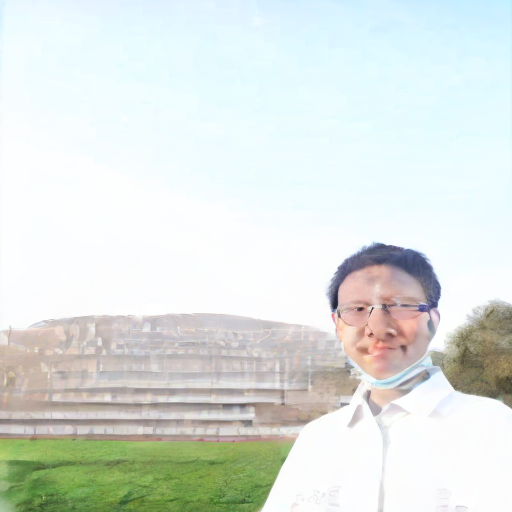

In [14]:
import sys
sys.path.append("../")
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch
from lora_diffusion import tune_lora_scale, patch_pipe

model_id = "stabilityai/stable-diffusion-2-1-base"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a photo of <krk> with dark background"
patch_pipe(
    pipe,
    "../training_scripts/output_example_tisd2-1/lora_weight.safetensors",
    #"../training_scripts/output_example_tisd2-1/lora_weight_e1499_s4500.pt",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 1.0)
tune_lora_scale(pipe.text_encoder, 1.00)

torch.manual_seed(1)
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
image